Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [3]:
training_set = tf.keras.preprocessing.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    interpolation="bilinear",
    shuffle=True ,
    rescale=1./255 
)

Found 68181 files belonging to 38 classes.


In [4]:
validation_set = tf.keras.preprocessing.image_dataset_from_directory(
    'valid',
    labels="inferred",           
    label_mode="categorical",   
    color_mode="rgb",
    batch_size=32,              
    image_size=(128, 128),  
    interpolation="bilinear",
    shuffle=True,
     rescale=1./255 
)


Found 17573 files belonging to 38 classes.


In [5]:
model= Sequential()

In [6]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [7]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [8]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [9]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units=1500,activation='relu'))
model.add(Dropout(0.4)) 

In [12]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                    

In [18]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2131/2131 [==============================] - 330s 142ms/step - loss: 1.3149 - accuracy: 0.6134 - val_loss: 0.5012 - val_accuracy: 0.8395
Epoch 2/10
2131/2131 [==============================] - 311s 146ms/step - loss: 0.4243 - accuracy: 0.8656 - val_loss: 0.2608 - val_accuracy: 0.9164
Epoch 3/10
2131/2131 [==============================] - 303s 142ms/step - loss: 0.2552 - accuracy: 0.9175 - val_loss: 0.2090 - val_accuracy: 0.9315
Epoch 4/10
2131/2131 [==============================] - 282s 132ms/step - loss: 0.1799 - accuracy: 0.9411 - val_loss: 0.1949 - val_accuracy: 0.9367
Epoch 5/10
2131/2131 [==============================] - 291s 137ms/step - loss: 0.1389 - accuracy: 0.9550 - val_loss: 0.1811 - val_accuracy: 0.9433
Epoch 6/10
2131/2131 [==============================] - 280s 131ms/step - loss: 0.1061 - accuracy: 0.9653 - val_loss: 0.1534 - val_accuracy: 0.9529
Epoch 7/10
2131/2131 [==============================] - 278s 130ms/step - loss: 0.0868 - accuracy: 0.9718 - val_

In [19]:
train_loss, train_acc = model.evaluate(training_set)
print(f"Training Accuracy: {train_acc * 100:.2f}%")
print(f"Training Loss: {train_loss:.2f}")


2131/2131 [==============================] - 92s 43ms/step - loss: 0.0236 - accuracy: 0.9924
Training Accuracy: 99.24%
Training Loss: 0.02


In [20]:
val_loss, val_acc = model.evaluate(validation_set)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")
print(f"Validation Loss: {val_loss:.2f}")


550/550 [==============================] - 24s 43ms/step - loss: 0.1187 - accuracy: 0.9660
Validation Accuracy: 96.60%
Validation Loss: 0.12


In [22]:
model.save('trained_model_PDD')  # Saves the model in the director

INFO:tensorflow:Assets written to: trained_model_PDD\assets


INFO:tensorflow:Assets written to: trained_model_PDD\assets


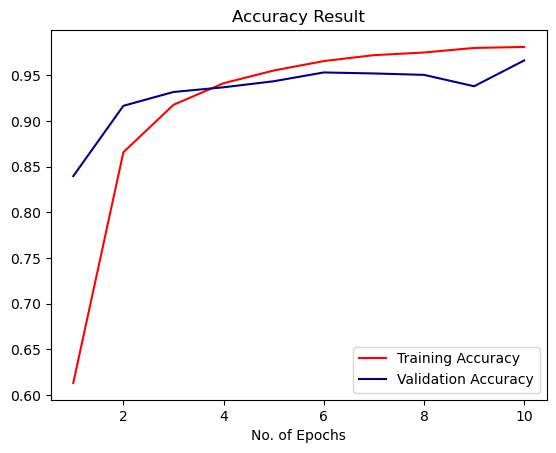

In [26]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='darkblue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [46]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    interpolation="bilinear",
    rescale=1./255 
)

Found 17573 files belonging to 38 classes.


In [57]:
class_name = validation_set.class_names
print(class_name)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [47]:
model =tf.keras.models.load_model('trained_model_PDD')

In [48]:
pred = model.predict(test_set)
predicted_categories = tf.argmax(pred, axis=1)

17573/17573 [==============================] - 736s 42ms/step


In [49]:
true = tf.concat([y for x, y in test_set], axis=0)
true_categories = tf.argmax(true_categories, axis=1)

In [50]:
true_categories

<tf.Tensor: shape=(17573,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [51]:
predicted_categories

<tf.Tensor: shape=(17573,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [59]:
from sklearn.metrics import classification_report
print(classification_report(true_categories,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.95      0.98      0.96       505
                                 Apple___Black_rot       0.99      0.98      0.99       497
                          Apple___Cedar_apple_rust       0.99      0.97      0.98       440
                                   Apple___healthy       0.97      0.96      0.97       502
                               Blueberry___healthy       0.98      0.96      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.98       421
                 Cherry_(including_sour)___healthy       0.99      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.91      0.94       410
                       Corn_(maize)___Common_rust_       1.00      0.99      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.97      0.